In [2]:
import os
import sys
root = os.path.dirname(os.getcwd())
sys.path.append(root)

In [3]:
import time
import numpy as np
import cPickle
from PIL import Image
import matplotlib.pyplot as plt

from ellearning.ELAlgorithm import Autoencoder
from config import Config
from utils import nnmath, utils

load results for elastic and compound learning on MNIST

In [85]:
e_logs = cPickle.load(open(utils.get_full_path(Config.PATH_EVAL_ROOT, "results-elastic-mnist-200.pkl"), 'r'))
layer_sizes, times, epochs, errors, pre, rec, f1 = [], [], [], [], [], [], []
e_cum_time = 0.
e_cum_times = []
trained_sizes = sorted([int(k)+1 for k in e_logs])
for k in trained_sizes:
    node_index = str(k-1)
    e_cum_time += sum(e_logs[node_index][Autoencoder.STR_TIMES])
    if Autoencoder.STR_SCORES in e_logs[node_index]:
        layer_sizes.append(k)
        times.append(sum(e_logs[node_index][Autoencoder.STR_TIMES]))
        e_cum_times.append(e_cum_time)
        epochs.append(len(e_logs[node_index][Autoencoder.STR_TIMES]))
        errors.append(e_logs[node_index][Autoencoder.STR_ERRORS][-1])
        (prec, reca, f1s) = e_logs[node_index][Autoencoder.STR_SCORES]
        pre.append(np.mean(prec))
        rec.append(np.mean(reca))
        f1.append(np.mean(f1s))

1
14.5841798782
4
49.7702753235
0.0854752206879
0.200518270013
0.0786222147032
10
7.04082798958
2
34.5341372913
0.727810136821
0.729787713057
0.725901846466
20
7.05939912796
2
28.0680971751
0.799407374207
0.798931400654
0.797875665155
30
7.10505509377
2
23.7372727894
0.841265105272
0.841220758976
0.840928967931
40
7.30709719658
2
20.5234317471
0.861585811368
0.861080520381
0.861001900468
50
7.41533112526
2
18.1747341435
0.874212950166
0.873326901548
0.873470458677
60
7.32319426537
2
16.1580454593
0.881601008717
0.880852213072
0.880981259036
70
7.41286897659
2
14.7274844325
0.892855556203
0.892188916814
0.892313819329
80
7.26445126534
2
13.4313144165
0.898106344354
0.897400126092
0.897514109785
90
6.92432594299
2
12.5713175834
0.903881022892
0.903105737878
0.903254405135
100
6.98132514954
2
11.8529384924
0.910732158831
0.909970799591
0.91017197856
110
7.00541996956
2
11.2379425891
0.913495323502
0.913040340034
0.913129211797
120
7.07294821739
2
10.8035464453
0.916759956032
0.91618877272

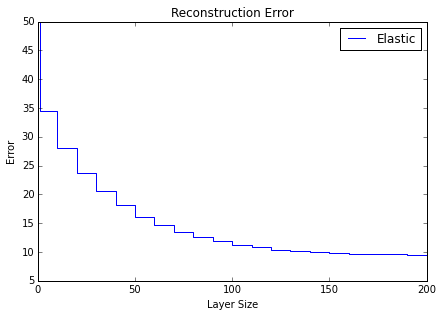

In [24]:
%matplotlib inline
fig = plt.figure(2)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
(line,) = axes.step(layer_sizes, errors)
axes.set_xlabel('Layer Size')
axes.set_ylabel('Error')
axes.set_title('Sum Squared Error')
plt.setp(line, label='Elastic')
axes.legend(loc='upper right')

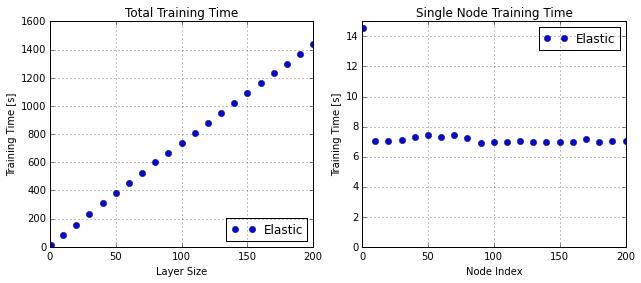

In [89]:
#times_integrated = []
#cum_time = 0.
#for time in times:
#    cum_time += time
#    times_integrated.append(cum_time)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
(line,) = axes[0].plot(layer_sizes, e_cum_times, 'o')
axes[0].set_xlabel('Layer Size')
axes[0].set_ylabel('Training Time [s]')
axes[0].set_title('Total Training Time')
axes[0].grid(True)
plt.setp(line, label='Elastic')
axes[0].legend(loc='lower right')

(line,) = axes[1].plot(layer_sizes, times, 'o')
axes[1].set_xlabel('Node Index')
axes[1].set_ylabel('Training Time [s]')
axes[1].set_title('Single Node Training Time')
axes[1].grid(True)
axes[1].set_ylim([0, 15])
plt.setp(line, label='Elastic')
axes[1].legend(loc='upper right')
fig.tight_layout()

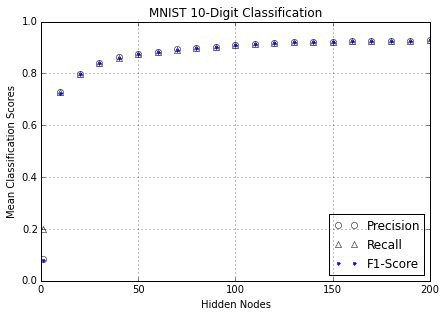

In [67]:
fig = plt.figure(4)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
(e_lpre,) = axes.plot(layer_sizes, pre, 'wo', label='Precision')
(e_lrec,) = axes.plot(layer_sizes, rec, 'w^', label='Recall')
(e_lf1,) = axes.plot(layer_sizes, f1, 'b.', label='F1-Score')
#plt.setp(e_lpre, label='Precision (E)')
#plt.setp(e_lrec, label='Recall (E)')
#plt.setp(e_lf1, label='F1 (E)')
axes.grid(True, which="both")
axes.set_title("MNIST 10-Digit Classification")
axes.set_xlabel('Hidden Nodes')
axes.set_ylabel('Mean Classification Scores')
axes.legend(loc='lower right')

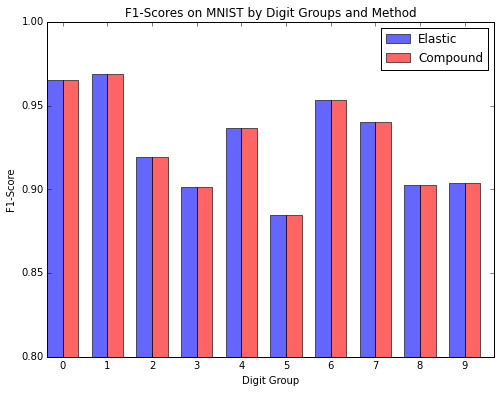

In [84]:
n_groups = 10
fig, axes = plt.subplots(figsize=(8,6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.6
error_config = {'ecolor': '0.3'}
bars1 = plt.bar(index, e_logs['199'][Autoencoder.STR_SCORES][2], bar_width, alpha=opacity, color='b', error_kw=error_config, label='Elastic')
bars2 = plt.bar(index + bar_width, e_logs['199'][Autoencoder.STR_SCORES][2], bar_width, alpha=opacity, color='r', error_kw=error_config, label='Compound')

plt.xlabel('Digit Group')
plt.ylabel('F1-Score')
plt.title('F1-Scores on MNIST by Digit Groups and Method')
plt.xticks(index + bar_width, ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'))
plt.ylim([0.8,1.0])
plt.legend()